## IMPORT

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session
import numpy as np
import pandas as pd
import sklearn
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
print("We are using TensorFlow: ", tf.__version__)
print("We are using Keras: ", keras.__version__)

We are using TensorFlow:  2.6.0
We are using Keras:  2.6.0


## GPU Check

In [3]:
# Check if GPU works
print(tf.test.gpu_device_name())
# GPU cout and name
!nvidia-smi -L

/device:GPU:0
GPU 0: NVIDIA GeForce GTX 1050 Ti (UUID: GPU-fa68e8f4-96f0-d795-a3d2-b6344f49a27e)


In [4]:
# GPU activity
!nvidia-smi

Tue Aug  2 15:45:44 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 516.01       Driver Version: 516.01       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:08:00.0  On |                  N/A |
| 30%   34C    P0    N/A /  75W |   1024MiB /  4096MiB |      4%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## MNIST

In [5]:
# Data downloading
(x_train, y_train),(x_val, y_val) = tf.keras.datasets.mnist.load_data()

In [6]:
# Data shape
print(x_train.shape)
print(y_train.shape)
print(y_train[:10])

(60000, 28, 28)
(60000,)
[5 0 4 1 9 2 1 3 1 4]


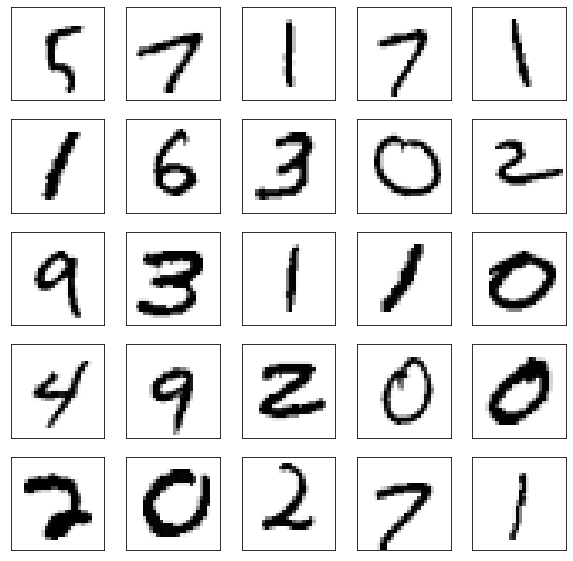

In [7]:
# Show Images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i+100], cmap="Greys")


In [8]:
# Reshape Data
x_train_flat = x_train.reshape(-1, 28*28).astype(float)
print(x_train.shape, x_train_flat.shape)

x_val_flat =  x_val.reshape(-1, 28*28).astype(float)
print(x_val.shape, x_val_flat.shape)

(60000, 28, 28) (60000, 784)
(10000, 28, 28) (10000, 784)


In [9]:
# Rescaling Data
x_train_float = x_train_flat.astype(float) / 255 - 0.5
x_val_float = x_val_flat.astype(float) / 255 - 0.5

# # Without Rescaling
# x_train_float = x_train_flat.astype(float)
# x_val_float = x_val_flat.astype(float)

In [10]:
# One-hot encoding
y_train_oh = keras.utils.to_categorical(y_train, 10)
y_val_oh = keras.utils.to_categorical(y_val, 10)

print(y_train_oh.shape)
print(y_train_oh[:5], y_train[:5])

(60000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]] [5 0 4 1 9]


## Multi Layer Perceptron (MLP) Keras

In [11]:
clear_session()

In [12]:
# Neural Network Architecture
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(x_train_float.shape[1],)))
model.add(Dense(128, activation='relu',))
model.add(Dense(10, activation='softmax',))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [15]:
history = model.fit(
    x_train_float,
    y_train_oh,
    batch_size=32,
    epochs=10,
    validation_data=(x_val_float, y_val_oh)
)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3149 - accuracy: 0.9040 - val_loss: 0.1742 - val_accuracy: 0.9460
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1590 - accuracy: 0.9510 - val_loss: 0.1356 - val_accuracy: 0.9578
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1179 - accuracy: 0.9643 - val_loss: 0.1006 - val_accuracy: 0.9697
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0961 - accuracy: 0.9697 - val_loss: 0.0962 - val_accuracy: 0.9699
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0858 - accuracy: 0.9732 - val_loss: 0.1062 - val_accuracy: 0.9674
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0720 - accuracy: 0.9772 - val_loss: 0.0910 - val_accuracy: 0.9709
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0654 - accuracy: 0.9790 - val_loss: 0.0940 - val_accuracy:

## Plot Traning Values

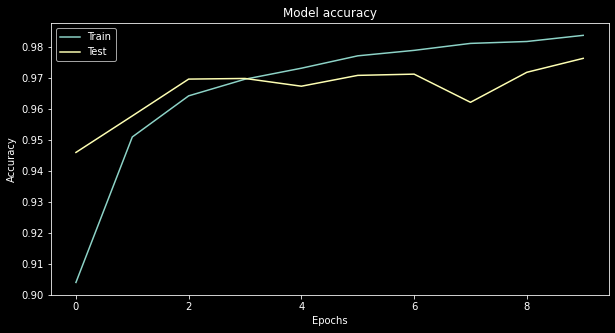

In [16]:
# Plot traning and validation accuracy values
plt.style.use(['dark_background'])
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

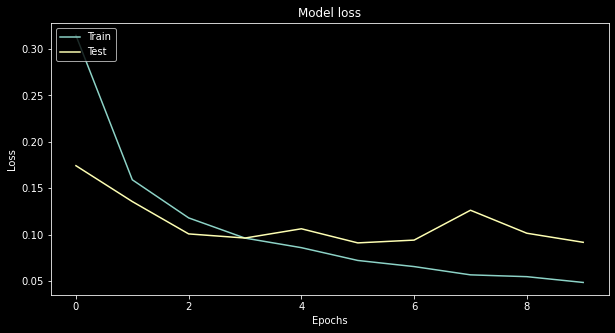

In [19]:
# Plot training & validation loss values
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [21]:
model.predict(x_val_float)

array([[5.0480232e-12, 2.2459767e-08, 2.0625816e-06, ..., 9.9972874e-01,
        1.7754493e-09, 5.5956866e-07],
       [1.3719954e-10, 2.7863232e-05, 9.9997187e-01, ..., 1.2994693e-11,
        2.1306998e-07, 1.3639445e-16],
       [1.0832094e-10, 9.9999642e-01, 5.1187861e-08, ..., 1.0728403e-06,
        5.9862373e-08, 1.2502296e-09],
       ...,
       [2.9123370e-19, 4.5044700e-13, 3.7341071e-14, ..., 1.5493883e-07,
        1.0319173e-09, 2.9724788e-07],
       [1.8364311e-08, 9.1147535e-07, 1.6136614e-08, ..., 6.4209331e-08,
        3.5778090e-02, 4.2052180e-09],
       [1.7527868e-11, 1.8422702e-14, 1.7812971e-10, ..., 2.4824179e-15,
        1.0602723e-10, 1.3514286e-12]], dtype=float32)

In [28]:
# Predict Classes
predicts = np.argmax(model.predict(x_val_float), axis=1)
print(predicts)

[7 2 1 ... 4 5 6]


In [29]:
print("Accuracy: ", accuracy_score(y_val, predicts))

Accuracy:  0.9764
